In [31]:
## Regressaão Linear

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
 
import numpy as np


In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
teste = pd.read_csv("Corona_NLP_test.csv")
treino = pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')

data = pd.concat([teste,treino])

data = data.sample(frac=0.5, random_state=42)
# Separar y referencia
ytreino = data['Sentiment']

# Remover y do conjunto de treino
data = data.drop(columns=['Sentiment'])

In [34]:
data = data.drop(columns=["UserName", "ScreenName","Location"], axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22478 entries, 29256 to 10047
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetAt        22478 non-null  object
 1   OriginalTweet  22478 non-null  object
dtypes: object(2)
memory usage: 526.8+ KB


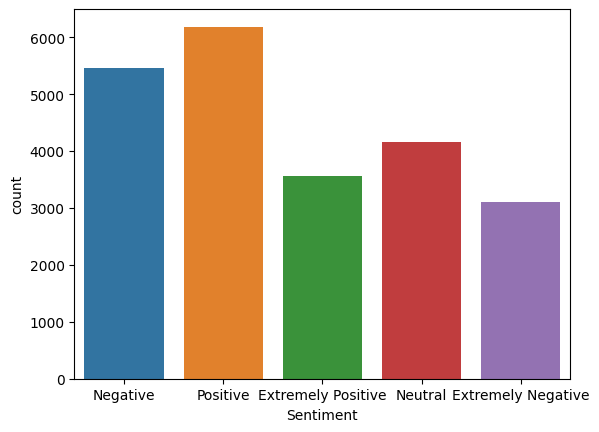

In [36]:
sns.countplot(x=ytreino)
plt.show()

In [37]:
#Let's make a function to preprocess the text
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
import string

def clean_text(text):
    text = text.lower().split()
    
    #Remove punctuations
    text = [word.translate(str.maketrans('', '', string.punctuation)) for word in text]
    
    #Remove Stopwords
    text = [word for word in text if word not in stop_words]
    
    #Stemming
    text = [stemmer.stem(word) for word in text]
    
    #Joining the text
    joined = ' '.join(text)
    return joined

In [29]:
data['text'] = data['OriginalTweet'].apply(clean_text)
data.head()

,TweetAt,OriginalTweet,text
29256,05-04-2020,Worried about empty grocery store shelves or l...,worri empti groceri store shelv limit food del...
29766,05-04-2020,https://t.co/45FPPhe6E3: Victoria helps with f...,httpstco45fpphe6e3 victoria help food product ...
28909,05-04-2020,Breaking News: A #HERO @NHSuk worker has been ...,break news hero nhsuk worker âattackedâ id b...
9454,20-03-2020,We all have a role to play during this pandemi...,role play pandem today help drive test site he...
34039,08-04-2020,Currently in the most spaced-out queue IÂve e...,current spacedout queue iâv ever buy essenti ...


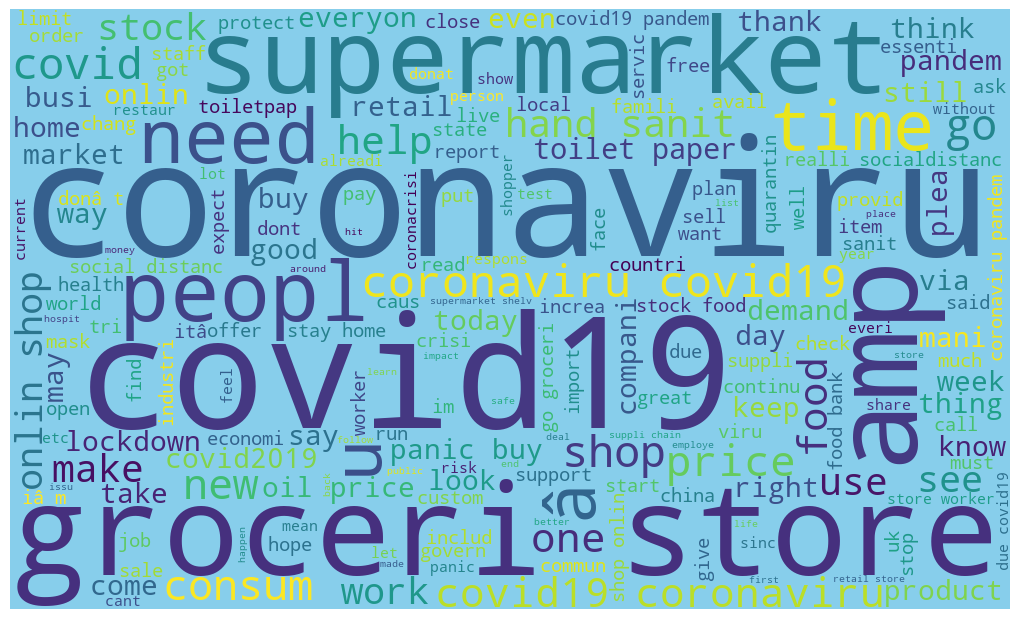

In [30]:
all_words = ' '.join(word for word in data['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'skyblue',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [39]:
#Converting the Sentiment values into numbers
le = LabelEncoder()
y = ytreino
y = le.fit_transform(y)

#Vectorizing the text into array
X = data['text']
vec = TfidfVectorizer()
X = vec.fit_transform(X).toarray()

KeyError: 'text'

In [11]:
#Now split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train, y_train)

In [13]:
# y_pred = model.predict(X_test)

In [14]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

In [15]:
#Visualizing model results
# evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
XTrain = pca.fit_transform(X_train)
XTest = pca.transform(X_test)

In [17]:
import time

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, y_train)
end_time = time.perf_counter()

print("Tempo de treino",  end_time-start_time)


Tempo de treino 0.3959783999598585


In [18]:
print(pca.explained_variance_ratio_)

[0.00513262 0.00419195]
